# PC 2 : Interpolation polynomiale

**<big>Éléments de correction</big>**

**<big> Préparation avant la PC :</big>**

**Les questions 1 à 3 de l'exercice 1 et les questions 1 et 2 de l'exercice 2 sont à préparer** avant la séance de PC du 07/09.

**<big><font color=black><span style="background-color:skyblue">À rendre</span></font> après la PC :</big>** 

**L'exercice 1 et les parties I et II de l'exercice 2 (en bleu) présentent des questions <font color=black><span style="background-color:skyblue">à rendre</span></font> avant le 11/09 à 20h00. La partie II de l'exercice 2 est <font color=black><span style="background:deepskyblue">bonus</span></font>**. 

**<big> Packages </big>**

In [1]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

**<big> Notations</big>**
>Dans toute cette PC, on considère
>- $f$ : $[a, b] \rightarrow \mathbb{R}$ une fonction continue,
>- $\|f\|_{\infty} = \max\limits_{x\in[a,b]} |f (x)|$,
>- $x_0$, ..., $x_n$ des points deux à deux distincts de $[a, b]$,
>- la base de Newton formée des polynômes $\Pi_{k}(X) = \prod\limits_{j=0}^{k-1} (X - x_j)$  (avec $\Pi_0 = 1$),
>- la base de Lagrange formée des polynômes $l_k(X)=\underset{j\neq k}{\prod\limits_{j=0}^{n}}\frac{X-x_j}{x_k-x_j}$,
>- $p_n(f) = \sum\limits_{k=0}^n f(x_k) l_k$ le polynôme d’interpolation de Lagrange de $f$ aux points $x_k$.

---

## Exercice 1 : Estimations d'erreur et phénomène de Runge

>On appelle <i>constante de Lebesgue</i>, et on note $\Lambda_n$, la norme de l'opérateur d'interpolation de Lagrange :
>
>$$
\mathcal{L}_n : \left\{
\begin{aligned}
\mathcal{C}^0\left([a,b]\right) &\to \mathcal{C}^0\left([a,b]\right) \\
f &\mapsto p_n(f).
\end{aligned}
\right.
$$
>
>Autrement dit, pour tout $f,g\in\mathcal{C}^0\left([a,b]\right)$, on a
>
>$$\left\Vert p_n(f) - p_n(g) \right\Vert_\infty \leq \Lambda_n \left\Vert f - g \right\Vert_\infty.$$
>
>On admettra que, 
>- si les points $x_i$ sont équidistant, $\Lambda_n\sim \frac{2^{n+1}}{en\ln n}$,
>- si les points $x_i$ sont les points de Tchebyshev, $\Lambda_n \sim \frac{2}{\pi}\ln n$.
>
>Pour plus de détails, voir ([1,4]) et l'exercice 5.

---
**<big> I) Première estimation d'erreur</big>**

### Question 1 : 
Démontrer l'estimation (1.4) du cours : Pour une fonction $f\in C^{n+1}(\mathbb{R})$, alors

$$ \|f - p_n(f)\|_\infty \le \frac{\|\Pi_{n+1}\|_\infty}{(n+1)!} \| f^{(n+1)}\|_\infty.$$

*Indication :* 
- Dans un premier temps, en tout point $x\in[a,b]$, on pourra écrire $f(x) = p_{n+1,x}(f)(x)$ comme un polynôme d'interpolation de degrés $n+1$ pour faire apparaitre $\Pi_n$.   
- Dans un second temps, on exploitera la fonction $\phi_x(y) = f(y)-p_n(f)(y) - c(x) \Pi_n(y)$ pour une fonction $c$ appropriée.

<div class="alert alert-block alert-info">
Soit $\bar{x} \in [a,b]$. Posons $p_{n+1, \bar{x}}(f)(x)$ le polynôme d'interpolation de degré $n+1$ tel que
\[\forall i=0,...,n \quad p_{n+1, x}(f)(x_i) = f(x_i)  \quad \text{et} \quad p_{n+1, x}(f)(\bar{x}) = f(\bar{x}).\]
Alors par le $\textit{Lemme 2.5}$ du poly il existe $\xi \in [a,b]$ tel que
\[\delta^{n+1} y[x_0,...,x_n,\bar{x}] = \frac{f^{n+1}(\xi)}{n!} = \frac{p_{n+1, \bar{x}}(f)(\xi)}{n!}.\]
Posons $c(\bar{x}) = \delta^{n+1} y[x_0,...,x_n,\bar{x}]$. On remarque que $p_{n+1, \bar{x}}(f) = p_n(f) + c(\bar{x})\Pi_{n+1}$.$\\$
Soit $\phi_{\bar{x}}(x) = f(x) - p_n(f)(x) - c(\bar{x}) \Pi_n(x)$.
On remarque que $\phi_{\bar{x}}(x) = 0 \quad \forall x \in {x_0,...,x_n,\bar{x}}$. $\\$
Donc, en appliquant $n$ fois le Théorème de Rolle, $\phi_{\bar{x}}^{(n+1)}$ a un zéro $y \in [a,b].$ $\\$
Alors, $\phi_{\bar{x}}^{n+1}(y) = f^{(n+1)}(y) - (n+1)!c(\bar{x}) = 0 \implies c(\bar{x}) = \frac{f^{(n+1)}(y)}{(n+1)!}.$ $\\$
On en conclue
    \[\forall x \in [a,b] \quad f(x) - p_n(f)(x) = p_{n+1, x}(f)(y) - p_n(f)(y) = c(\bar{x}) \Pi_{n+1}(x) = \frac{f^{(n+1)}(x)}{(n+1)!}\Pi_{n+1}(x).\]
    Donc $ \|f - p_n(f)\|_\infty \le \frac{\|\Pi_{n+1}\|_\infty}{(n+1)!} \| f^{(n+1)}\|_\infty.$
</div>

### Question 2 :
On admet ici la formule de Cauchy : Si $f$ est développable en série entière sur un ouvert contenant le disque fermé de centre $x$ et de rayon $r$ alors 

$$\frac{f^{(n)}(x)}{n!} = \frac{1}{2i\pi} \int_0^{2\pi} \frac{f(x+re^{i\theta})e^{-i(n+1)\theta}}{r^{(n+1)}}d\theta. $$

Démontrer que si $f$ est développable en série entière en $\frac{a+b}{2}$ avec un rayon de convergence $R>3\frac{b-a}{2}$, alors $\|f-p_n(f)\|_\infty \underset{n\rightarrow +\infty}{\rightarrow} 0$.

<div class="alert alert-block alert-info">
    On veut montrer que $$ \frac{||\Pi_{n+1}||_{\infty}}{(n+1)!}||f_{n+1}||_{\infty} \underset{n\rightarrow +\infty}{\rightarrow} 0.$$
    On sait que $\forall i, x_i \in [a,b]$ alors $$ ||\Pi_{n+1} (X) ||  = \prod\limits_{i=0}^n |x-x_i| \leq (b-a)^{n+1}.$$
    Soient $r, \bar{R}$ tels que $r > b-a$ et $r + \frac{b-a}{2} < \bar{R} < R$ avec $R - \bar{R}$ arbitrairement petit.
    D'abord, on sait que $B_f(x, r) \subset B(\frac{a+b}{2}, R)$.$\\$
    Soit $y \in B_f(x, r)$ on a
    \[\left|y - \frac{a+b}{2}\right| \leq |y-x| + \left| x - \frac{a+b}{2} \right| \leq r + \frac{b-a}{2} < R.\]
    Posons $M = \max_{z \in B_f(\frac{a+b}{2}, \bar{R})} |f(z)|$. On a $\left| \frac{f^{n}(x)}{n!} \leq \frac{M}{r^n} \right|.$ $\\$
    Alors $\frac{||\Pi_{n+1}||_{\infty}}{(n+1)!}||f_{n+1}||_{\infty} \leq M \left(\frac{b - a}{r}\right)^{n+1}\underset{n\rightarrow +\infty}{\rightarrow} 0.$
</div>

### Question 3 :
En déduire que l'erreur d'interpolation à points équidistant de la fonction sinus sur $[-\pi,\pi]$ tend vers zéro plus rapidement que $\rho^n$ pour tout $\rho \in ]0,1[$. 

<div class="alert alert-block alert-info">
    La fonction sinus est développable en série entière $\forall x \in \mathbb{R}$. $\\$
    On considère le disque fermé de centre $0$ et rayon $\pi$, ça veut dire l'intervalle $[-\pi, \pi]$. $\\$
    Alors en utilisant la question précedente, l'erreur d'interpolation $\frac{||\Pi_{n+1}||_{\infty}}{(n+1)!}||f_{n+1}||_{\infty} \leq M \left(\frac{b - a}{r}\right)^{n+1} = \left(\frac{b - a}{\pi}\right)^{n+1} = \rho^{n+1}$. $\\$
    Il suffit de remarque que $\rho^{n+1}$ tend vers zéro plus rapidement que $\rho^n$ pour tout $\rho \in ]0,1[$. 
</div>

>Dans toute la suite, on utilisera la fonction donnée dans la cellule suivante. Elle construit le polynôme d'interpolation dans la base de Lagrange 
>
>$$p_n(f) = \sum\limits_{k=1}^n y_k l_k$$
>
>où on doit fixer les $y_k = f(x_k)$ et les polynômes de Lagrange sont définis en en-tête.

In [2]:
def Lagrange(x_i, y_i, x):
    """
    calcule le polynome d'interpolation passant par les points (x_i,y_i) aux points x
    ----------
    parametres:
    x_i : points d'interpolation (np.array de taille N)
    y_i : valeurs atteintes aux points d'interpolation (np.array de taille N)
    x   : points où le polynome est évalués (np.array de taille Nx)
    
    valeur de retour:
    valeurs du polynome d'interpolation pn(f) aux points x (np.array de taille Nx)
    """
    N  = len(x_i)
    Nx = len(x)
    
    #Ici x_m_xi  est un tableau (N , Nx) contenant les x   - x_i pour tout i et tout x  
    #et  xi_m_xi est un tableau (N , N ) contenant les x_i - x_j pour tout i et j
    x_m_xi  = x[  :, np.newaxis] - x_i
    xi_m_xi = x_i - x_i[:, np.newaxis]

    li = np.zeros((Nx,N))
    for i in range(N):
        #Ici li est un  est un tableau (N , Nx) contenant les l_i(x) pour tout i et tout x  
        li[:,i] = np.prod(np.divide(x_m_xi[:,:i],xi_m_xi[np.newaxis,:i,i]),axis=1) * np.prod(np.divide(x_m_xi[:,i+1:],xi_m_xi[np.newaxis,i+1:,i]),axis=1) 
    
    return np.dot(li,y_i)

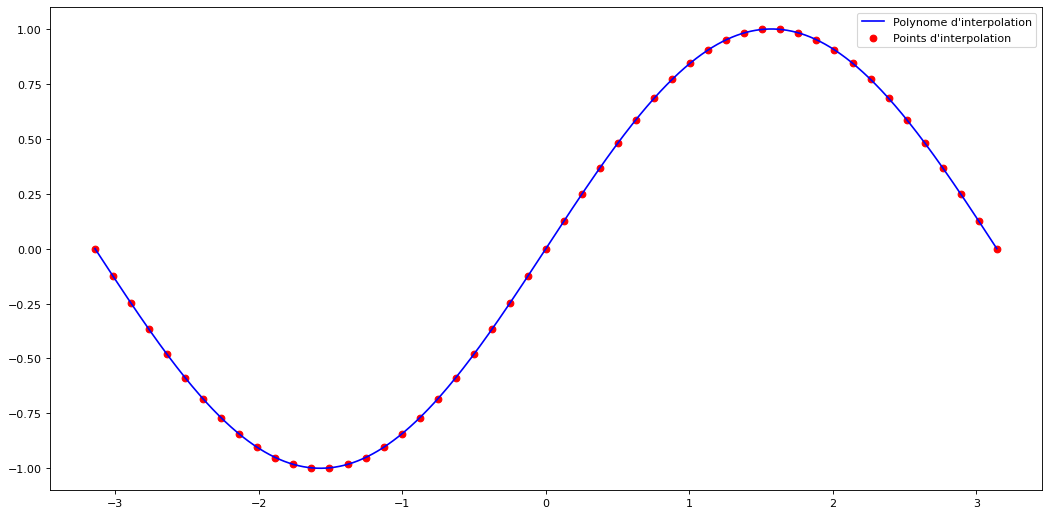

In [3]:
### Exemple d'utilisation de la fonction Lagrange avec la fonction sinus sur [-pi,pi]
N   = 50
Nx  = 2000 
xi  = np.linspace(-np.pi, np.pi, N +1) 
yi  = np.sin(xi)
x   = np.linspace(-np.pi, np.pi, Nx+1)

val = Lagrange(xi,yi,x)

#plt.figure()
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(   x,  val, color="blue", label="Polynome d'interpolation")
plt.scatter(xi, yi , color="red" , label="Points d'interpolation")
plt.legend()
plt.show()

### Question 4 :  
**<font color=black><span style="background-color:skyblue">À rendre</span></font> :**
On va maintenant vérifier ce comportement numériquement. On approchera $\|f-p_n(f)\|_\infty$ par $\max_i |f(y_i)-p_n(f)(y_i)|$ où les $y_i$ sont 2000 points équirépartis sur $[-1,1]$. 


a) Tracer $\max_i |f(y_i)-p_n(f)(y_i)|$ en fonction de $n$ (pour des points d'interpolation équirépartis) pour $n$ allant de 2 jusqu'à 50 en utilisant les fonctions suivantes. 

b) Expliquer le comportement avant $n<20$ et proposer une interprétation à partir de $n \approx 20$.

In [4]:
#a)
# Calculer l'erreur l_infini entre p_n(f) et f en fonction du nombre de points n d'interpolation
N       = 50
Nx      = 2000
x       = np.linspace(-np.pi, np.pi, Nx+1)
y       = np.sin(x)

nb_pts  = np.arange(N) + 2
err_inf = np.zeros(N)


# Construire le tableau err_inf des erreurs l_infini err_inf
for n in nb_pts:
    xi  = np.linspace(-np.pi, np.pi, n+1) 
    yi  = np.sin(xi)
    val = Lagrange(xi, yi, x)
    for i in range(Nx):
        err_inf[n-2] = max(err_inf[n-2], abs(y[i] - val[i]))

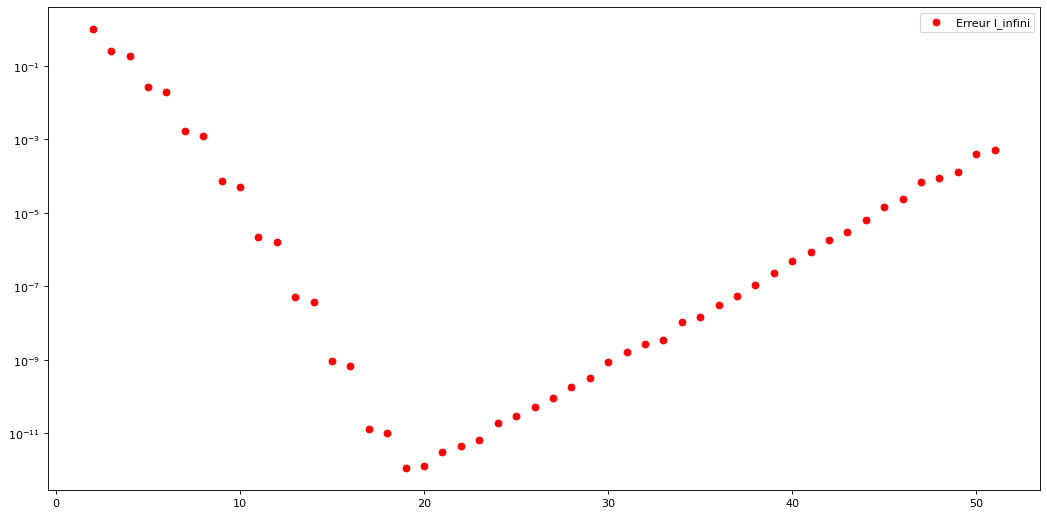

In [5]:
# Tracer l'erreur l_infini entre p_n(f) et f en fonction du nombre de points n d'interpolation
#plt.figure()
plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(nb_pts,err_inf ,color="red",label="Erreur l_infini")
plt.yscale("log") #permet de mieux analyser l'exercice
plt.legend()
plt.show() 

**Réponse :**
<div class="alert alert-block alert-info">
b) On a vérifie que l'erreur d'interpolation tend vers $0$ tend vers zéro plus rapidement que $\rho^n$ pour tout $\rho \in ]0,1[$. C'est ça le comportement observé por $n < 20$.
    Pourtant, on observe que l'erreur remonte pour $n > 20$. Il s'agit d'un problème de conditionnement associé à la représentation des réels en machine lorsque le nombre de points augmente.
</div>

---
**<big> II) Estimation d'erreur plus fine via la constante de Lebesgue</big>**

### Question 5 :

Démontrer que

$$ \left\Vert f- p_n(f)\right\Vert_{\infty} \leq \left(1+\Lambda_n\right) \inf\limits_{Q\in\mathbb{R}_n[X]} \left\Vert f-Q\right\Vert_{\infty}. $$

<div class="alert alert-block alert-info">
    $$\begin{align}
    || f - p_n(f) ||_{\infty} &\leq ||f - Q||_{\infty} + ||Q - p_n(f)||_{\infty}\\
                              &= ||f - Q||_{\infty} + ||p_n(Q) - p_n(f)||_{\infty}\\
                              &\leq ||f - Q||_{\infty} + \Lambda_n|| Q - f||_{\infty}\\
                              &= (1 + \Lambda_n)||f - Q||_{\infty}
    \end{align}$$
    Donc, $\left\Vert f- p_n(f)\right\Vert_{\infty} \leq \left(1+\Lambda_n\right) \inf\limits_{Q\in\mathbb{R}_n[X]} \left\Vert f-Q\right\Vert_{\infty}.$
</div>

### Question 6 :

On admet que si $f$ est lipschitzienne alors

$$\inf\limits_{Q\in\mathbb{R}_n[X]} \left\Vert f-Q\right\Vert_{\infty} \leq \frac{C_f}{\sqrt{n}}.$$

Que peut-on en déduire concernant la convergence du polynôme d'interpolation $p_n(f)$ vers $f$, selon que les points d'interpolations $x_k$ sont équidistants ou les points de Tchebychev?

<div class="alert alert-block alert-info">
On remarque que la constante $C_f = \frac{9L_f}{4}$ dépend uniquement du choix des points d'interpolation. Par définition, $L_f$ est minimale si et seulement si on choisit les points de Tchebychev. Donc, le choix de points de Tchebychev nous assure une constante plus stricte pour la convergence que le choix de points équidistants.
</div>

---
**<big> III) Phénomène de Runge </big>**

### Question 7 :

**<font color=black><span style="background-color:skyblue">À rendre :</span></font>**
On considère la fonction 

$$f(x) =\frac{1}{1 + 25x^2}$$

sur l'intervalle $[-1,1]$. Tracer le polynôme d'interpolation $p_n(f)$ pour différentes valeurs de $n$ (n=10, 20, 50), ainsi que l'erreur entre $f$ et $p_n(f)$, en prenant des points d'interpolations équidistants, puis les points de Tchebychef. Commenter. 

*Indication :* Pour les points de Tchebychef, on commencera par compléter la fonction *cheb_points* ci-dessous, et on testera qu'elle renvoie bien les bonnes valeurs pour l'intervalle $[-1,1]$ et de petites valeurs de n (n=2 et 3).

In [6]:
def f(x):
    """
    calcule la valeur de f(x)
    ----------   
    parametre:
    x : point ou on evalue f
    
    valeur de retour:
    valeur de f(x)
    """
    return 1/(1+25*x*x)

In [7]:
def cheb_points(xmin, xmax, n):
    """
    calcule la valeur des points de Tchebychev dans l'intervalle [xmin, xmax]
    ----------
    parametres:
    xmin : valeur minimale de l'intervalle
    xmax : valeur maximale de l'intervalle
    n : nb de points recquis sur l'intervalle
    
    valeur de retour:
    valeur des points de Tchebychev
    """
    pts = np.zeros(n+1)
    for k in range(n+1):
        pts[k] = np.cos(((2*k+1)*np.pi)/(2*n+2))
    return pts

In [8]:
# Tester la fonction cheb_points sur les cas a 2 et 3 points
n=2
print(f"Les points de Tchebychev pour {n} noeuds :",cheb_points(-1,1,n))
n=3
print(f"Les points de Tchebychev pour {n} noeuds :",cheb_points(-1,1,n))

Les points de Tchebychev pour 2 noeuds : [ 8.66025404e-01  6.12323400e-17 -8.66025404e-01]
Les points de Tchebychev pour 3 noeuds : [ 0.92387953  0.38268343 -0.38268343 -0.92387953]


In [9]:
# Tracer le polynome d'interpolation pour la fonction f
xmin = -1
xmax =  1
x = np.linspace(xmin, xmax, 2000)

# degre du polynome 
n = 20

# Construire les abscisses xk, les ordonnées yk et le polynome d'interpolation p 
# pour les différentes familles de points

# points equidistants
xk_equi = np.linspace(-1, 1, n+1)
yk_equi = f(xk_equi)
p_equi  = Lagrange(xk_equi, yk_equi, x)


# points de Tchebychef
xk_cheb = cheb_points(-1, 1, n)
yk_cheb = f(xk_cheb)
p_cheb  = Lagrange(xk_cheb, yk_cheb, x)


# Calculer le tableaux des erreurs entre p_n(f) et f aux points x
err_equi = np.abs(f(x) - p_equi)
err_cheb = np.abs(f(x) - p_cheb)

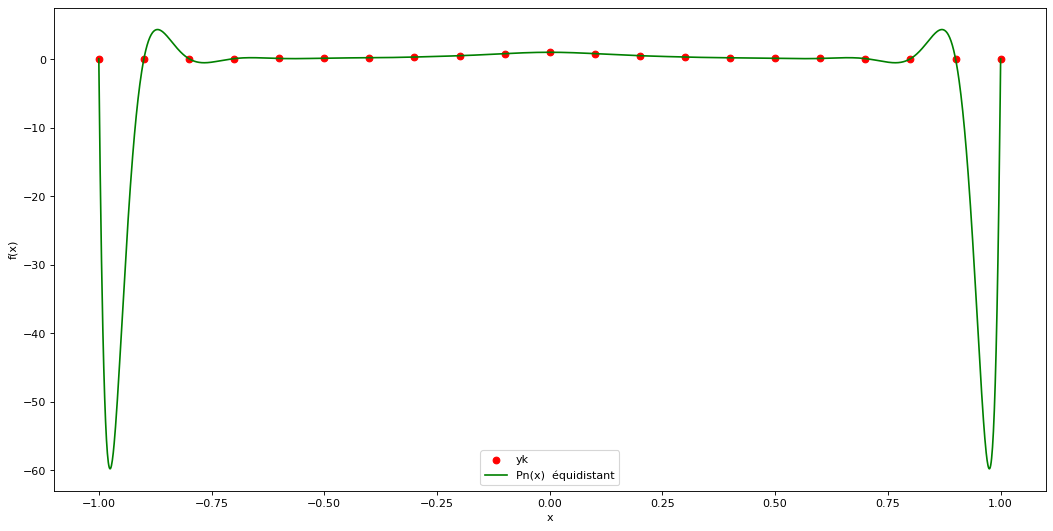

In [10]:
# Affichage avec le module matplotlib
#fig_equi=plt.figure()
fig_equi = plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk_equi, yk_equi, color="red",   label="yk")
plt.plot(   x,       p_equi,  color="green", label="Pn(x)  équidistant")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

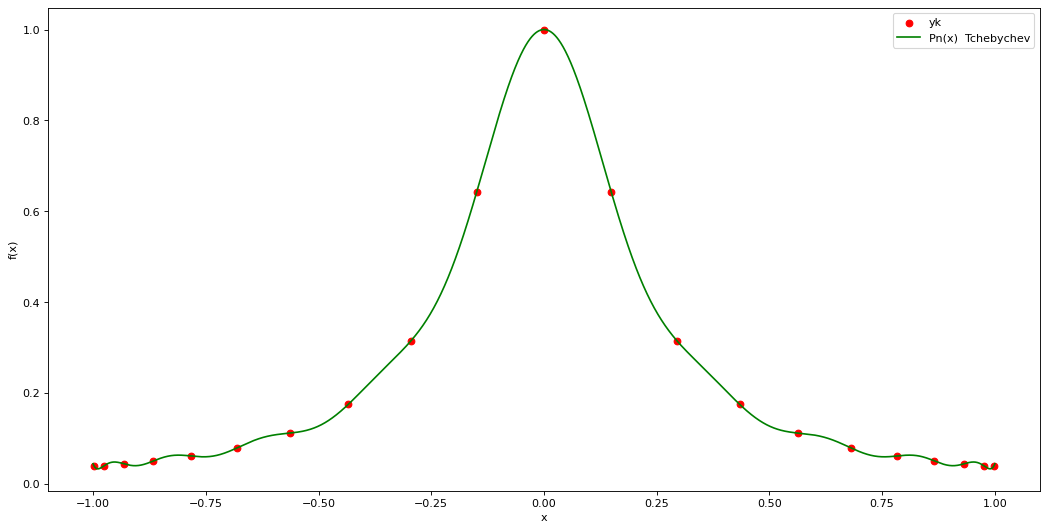

In [11]:
#fig_cheb=plt.figure()
fig_cheb = plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk_cheb, yk_cheb, color="red",   label="yk")
plt.plot(   x,       p_cheb,  color="green", label="Pn(x)  Tchebychev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

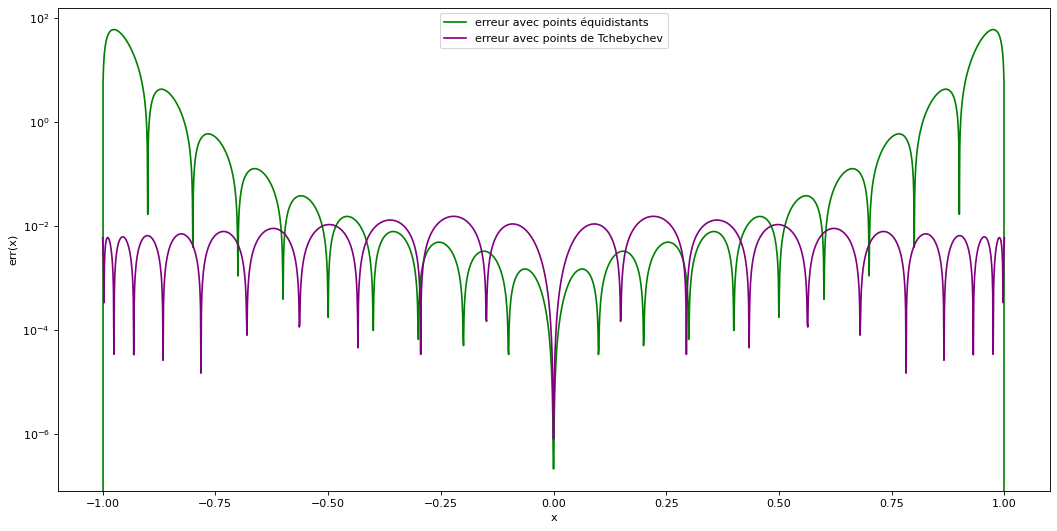

In [12]:
#fig_err = plt.figure()
fig_err = plt.figure(figsize=(16, 8), dpi=80)
plt.plot(x, err_equi, color="green",  label="erreur avec points équidistants")
plt.plot(x, err_cheb, color="purple", label="erreur avec points de Tchebychev")
plt.xlabel("x")
plt.ylabel("err(x)")

# convert y-axis to Logarithmic scale
plt.yscale("log")

plt.legend()
plt.show()

**Réponse :** 
<div class="alert alert-block alert-info">
    On remarque que les points de Tchebychev rendent l'erreur uniforme dans l'intervalle $[-1,+1]$, alors que pour les point équidistants on observe des grands errors aux bords.$\\$
    Comme on a vu en cours, pour les points de Tchebychev $\Lambda_n \sim \frac{2}{\pi}\ln n \implies$ l'interpolation converge en norme infini quand $n$ tend vers l'infini. Mais, on peut pas utiliser le même argument pour les points équidistants et dans cette exemple on observe des problèmes de convergence associés au mauvais conditionnement du problème.$\\$
</div>

---

## Exercice 2 : Conditionnement et stabilité du polynome d'interpolation ([5,4])

>Pour toute fonction continue $f$, on définit le conditionnement du polynôme d'interpolation $p_n(f)$ par
>
>$$\kappa_n(f) = \frac{1}{\varepsilon} \sup_{\frac{\left\Vert \Delta f\right\Vert_{\infty}}{\left\Vert f\right\Vert_{\infty}}\leq \varepsilon} \frac{\left\Vert p_n(f+\Delta f) - p_n(f)\right\Vert_{\infty}}{\left\Vert p_n(f)\right\Vert_{\infty}}.$$

---
**<big> I) Conditionnement du polynome d'interpolation et stabilité de la formule de Lagrange </big>**

### Question 1 :

Montrer que le conditionnement du polynôme d'interpolation peut être majoré de la manière suivante 

$$\kappa_n(f) \leq \frac{\left\Vert f\right\Vert_{\infty}}{\left\Vert p_n(f)\right\Vert_{\infty}} \Lambda_n.$$

Que peut-on en déduire concernant le conditionnement du polynôme d'interpolation, en fonction du choix des points d'interpolation?

<div class="alert alert-block alert-info">
    $$\begin{align}
    \kappa_n(f) &= \frac{1}{\epsilon} \sup_{\frac{||\Delta f||_{\infty}}{||f||_{\infty}} < \epsilon} \frac{||p_n(f + \Delta f) - p_n(f)||_{\infty}}{||p_n(f)||_{\infty}}\\
    &\leq \Lambda_n \frac{||f||_{\infty}}{||p_n(f)||_{\infty}}
    \end{align}$$
</div>

### Question 2 :

Donner une borne supérieur du conditionnement $\kappa_n$ du polynôme d'interpolation de la fonction de Runge avec les points de Tchebychev en fonction de $n$. On pourra notamment majorer ou minorer les normes infinies.   

<div class="alert alert-block alert-info">
    On a $f(x) = \frac{1}{1 + 25x^2} \leq 1$. En fait, étant donné que $p_n$ n'explode pas au bord on pose $\frac{||f||_{\infty}}{||p_n(f)||_{\infty}} = 1$ $\\$
    On utilise $\Lambda_n \sim \frac{2}{\pi} \ln n < C \ln n$ pour une constant $C$ approprié.
    Donc, $$\kappa_n(f) \leq  C \ln n $$
</div>

### Question 3 :

**<font color=black><span style="background-color:skyblue">À rendre :</span></font>**

1) Nous utilisons ici l'algorithme de l'exercice précédent sur la fonction de Runge 

$$ f(x) = \frac{1}{1+25x^2}. $$
 
- Tester cet algorithme sur cette fonction avec 32 points d'interpolation (a) équidistribués et (b) de Tchebychev. 
- Ajouter une petite perturbation aléatoire aux ordonnées, c'est-à-dire fixer

$$(f+\Delta f)(x_i) = \frac{1}{1+25x_i^2}+\epsilon_i$$

avec une perturbation $\epsilon_i$ aléatoire (on pourra utiliser la fonction rand ; https://numpy.org/doc/1.16/reference/generated/numpy.random.rand.html#numpy.random.rand) telle que $|\epsilon_i| < 2^{-10}$. 
- Tracer pour chaque famille de points les deux polynômes $p_n(f)$ et $p_n(f+\Delta f)$ sur le même graphe.
- Expliquer les différences et similarités entre ces courbes lorsqu'on utilise les points equidistribués et les points de Tchebychev. 

2) Calculer la distance relative 

$$\frac{\left\Vert p_n(f+\Delta f) - p_n(f)\right\Vert_{\infty}}{\left\Vert p_n(f)\right\Vert_{\infty}}$$

pour 32 points d'interpolation de Tchebychev (b). En déduire une estimation (numérique) par en dessous du conditionnement et comparer à l'estimation par au dessus de la question précédente. 

3) Sans perturbation $\epsilon_i = 0$, augmenter maintenant le nombre de points de Tchebychev (b) jusqu'à environ $n=660$. 
- Tracer à nouveau le polynôme d'interpolation dans ce cas.
- Calculer à nouveau l'estimation par au-dessus pour cette valeur de $n$. 
- Si le conditionnement est bas, d'où peuvent venir ces erreurs? Expliquer d'éventuels messages d'erreur ou de danger. 

In [13]:
#1)
xmin = -1
xmax =  1
x    = np.linspace(xmin, xmax, 2000)
epsilon = 2.**(-10)

# degre du polynome 
n = 32

# Construire les abscisses xk, les ordonnées yk et les polynomes d'interpolation p associés 

# points equidistants
xk_eq = np.linspace(-1, 1, n+1)
yk_eq = f(xk_eq)
p_eq  = Lagrange(xk_eq, yk_eq, x)


# points de Tchebychef
xk_cheb = cheb_points(-1, 1, n)
yk_cheb = f(xk_cheb)
p_cheb  = Lagrange(xk_cheb, yk_cheb, x)


# perturbation
yk_eq_pert   = yk_eq + np.random.rand(n+1)*epsilon
p_eq_pert    = Lagrange(xk_eq, yk_eq_pert, x) 

yk_cheb_pert = yk_cheb + np.random.rand(n+1)*epsilon
p_cheb_pert  = Lagrange(xk_cheb, yk_cheb_pert, x) 

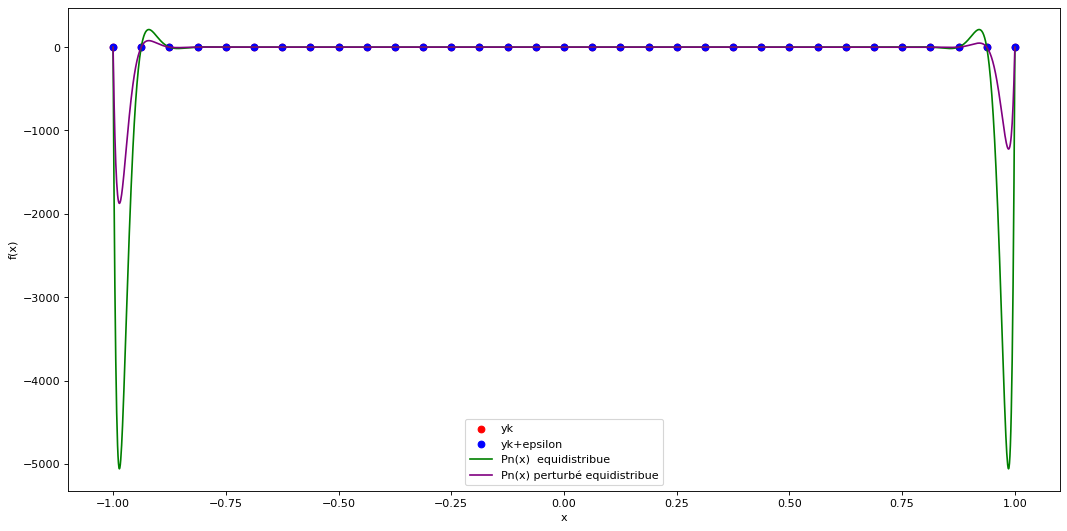

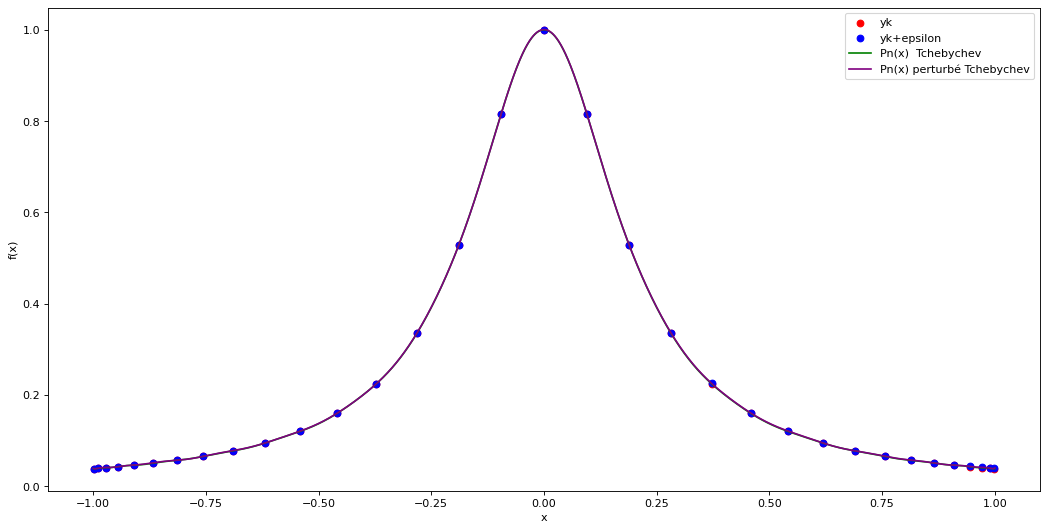

In [14]:
# Affichage avec le module matplotlib
fig_eq=plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk_eq, yk_eq     , color="red",    label="yk")
plt.scatter(xk_eq, yk_eq_pert, color="blue",   label="yk+epsilon")
plt.plot(   x,     p_eq      , color="green",  label="Pn(x)  equidistribue")
plt.plot(   x,     p_eq_pert , color="purple", label="Pn(x) perturbé equidistribue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

fig_cheb=plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk_cheb, yk_cheb     , color="red",    label="yk")
plt.scatter(xk_cheb, yk_cheb_pert, color="blue",   label="yk+epsilon")
plt.plot(   x,       p_cheb      , color="green",  label="Pn(x)  Tchebychev")
plt.plot(   x,       p_cheb_pert , color="purple", label="Pn(x) perturbé Tchebychev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [15]:
#2)
# estimation par en dessous de kappa
estim_basse = (1/epsilon)*(np.max(p_cheb_pert - p_cheb)/np.max(p_cheb))

# estimation par au dessus de kappa
estim_haute  = (2/np.pi)*np.log(n)*(np.max(f(xk_cheb))/np.max(yk_cheb))

print(estim_basse, "<= kappa <= ", estim_haute) 

1.1337245190481855 <= kappa <=  2.2063560015265162


In [16]:
#3)
xmin = -1
xmax =  1
x = np.linspace(xmin, xmax, 2000)

# degre du polynome 
n = 660

# Construire les abscisses xk, les ordonnées yk et le polynomes d'interpolation p associés 

# points de Tchebychef
xk_cheb = cheb_points(-1, 1, n)
yk_cheb = f(xk_cheb)

# polynome 
p_cheb  = Lagrange(xk_cheb, yk_cheb, x) 

# estimation haute
estim_haute = (2/np.pi)*np.log(n)*(np.max(f(xk_cheb))/np.max(yk_cheb))
print("kappa <= ", estim_haute)

/home/gabriel/ENTER/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


kappa <=  4.133088245926476


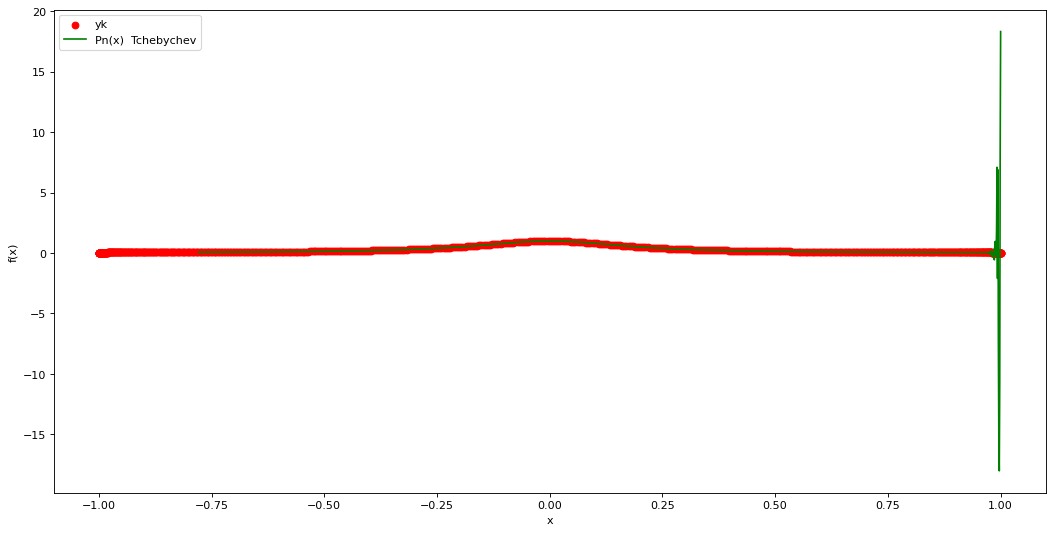

In [17]:
# Affichage avec le module matplotlib
fig_cheb=plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk_cheb, yk_cheb, color="red",   label="yk")
plt.plot(   x,       p_cheb , color="green", label="Pn(x)  Tchebychev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Réponse :** 
<div class="alert alert-block alert-info">
    On observe que même en utilisant les points de Tchebychef, pour $n$ suffisament grand on rencontre aussi des grands erreurs au bord.$\\$
    Dans l'éxecution du code on observe l'exception $\textit{overflow}$ lorsqu'on calcule $\kappa$ et dans le graphique on peut le constater visuellement.$\\$
    Il s'agit d'un problème d'instabilité de l'algorithme.
</div>

---
**<big>II) Polynôme d'interpolation de Tchebychev</big>**

> Les points de Tchebychev sont définis comme les zéros du polynôme $T_n$ de Tchebychev. Ces polynômes satisfont la propriété suivante 
>
> $$T_n(\cos\theta) = \cos(n\theta). \qquad{} (3)$$
>

### Question 4 :

On cherche à décomposer dans la base des polynômes de Tchebychev le polynôme d'interpolation passant par les points $(x_k,y_k)_{k=0,\dots,n}$ où les $x_k$ sont les points de Tchebychev  

$$ p_n(f) = \sum\limits_{k=0}^{n} c_k T_k.$$ 

Écrire le système linéaire satisfait par les coefficients $c_k$. 

<div class="alert alert-block alert-info">
    On pose $\forall i=0,...,n \quad p_n(f)(x_i) = f(x_i)$.
    Donc,
    $$ \sum_{k=0}^{n} c_k T_k(x_i) = f(x_i) $$
    on remarque que $T_k(x_i)$ et $f(x_i)$ sont connus. Alors, on peut utiliser ce système linéaire pour calculer les coefficients $c_k$. $\\$
    Dans la forme matriciel, on écrit $Tc = F$ avec 
    $$\begin{align}
    \begin{cases}
    T &= (t_{k,i})_{n+1 \times n+1} \quad \text{où} \quad t_{k,i} = T_k(x_i)\\
    c &= (c_0,...,c_n)^{T}\\
    F &= (f(x_0),...,f(x_n))^{T}
    \end{cases}
    \end{align}$$
</div>

### Question 5 :

En utilisant la propriété (3), montrer que les coefficients $c_k$ du polynômes d'interpolation dans la base de Tchebychev sont donnés par 

$$ c_0 = \frac{1}{n+1}\sum_{i=0}^n T_0(x_i) y_i, \qquad{} c_j = \frac{2}{n+1}\sum_{i=0}^n T_j(x_i) y_i \quad{}\forall j= 1, \dots, n. $$

<div class="alert alert-block alert-info">
    Pour résoudre le système obtenu à la question précedente on calcule $c = T^{-1}F$.
    Premièrement, montrons que $T^{-1} = (w_{k,i})_{n+1 \times n+1}$ où 
    $$\begin{align}
    \begin{cases}
    w_{0,i} &= \frac{1}{n+1}T_0(x_i) \quad \forall 0 \leq i \leq n\\
    w_{k,i} &= \frac{2}{n+1}T_k(x_i) \quad \forall 1 \leq k \leq n, \forall 0 \leq i \leq n
    \end{cases}
    \end{align}$$
    On veut vérifier que $T^{-1}T = I$. Soit $T^{-1}T = R = (r_{k,i})_{n+1 \times n+1}$.
    $$\begin{align}
    \begin{cases}
    r_{0,i} &= \sum_{j=0}^{n} w_{0,j}t_{j,i} = \frac{1}{n+1} \sum_{j=0}^{n} T_0(x_j)T_j(x_i)\\
    r_{k,i} &= \sum_{j=0}^{n} w_{k,j}t_{j,i} = \frac{2}{n+1} \sum_{j=0}^{n} T_k(x_j)T_j(x_i)
    \end{cases}
    \end{align}$$
    Pour calculer ces sommes on utilise que $T_k(x_j) = T_k\left(\cos\left(\frac{2j+1}{2n+2} \pi \right)\right) = \cos\left(\frac{2j+1}{2n+2} k\pi \right).$
    $$\begin{align}
    \begin{cases}
    r_{0,i} &= \frac{1}{n+1} \sum_{j=0}^{n} \cos\left(\frac{2i+1}{2n+2} j\pi \right) = \delta_{0,i}\\
    r_{k,i} &= \frac{2}{n+1} \sum_{j=0}^{n} \cos\left(\frac{2j+1}{2n+2} k\pi \right)\cos\left(\frac{2i+1}{2n+2} j\pi \right) = \delta_{k,i}
    \end{cases}
    \end{align}$$
    Donc $c = T^{-1}F \implies $
    $$\begin{align}
    \begin{cases}
    c_0 &= \frac{1}{n+1}\sum_{i=0}^n T_0(x_i) f(x_i) \\
    c_j &= \frac{2}{n+1}\sum_{i=0}^n T_j(x_i) f(x_i) \quad{}\forall j= 1, \dots, n.
    \end{cases}
    \end{align}$$
</div>

### Question 6 :

a) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Implémenter une fonction qui calcule les coefficients $c_k$. *Tester votre algorithme sur des cas simples, on prendra par exemple le cas $n=2$ et où les $y_j$ sont données par $y_j = T_0(x_j)$, $y_j = T_1(x_j)$ et $y_j = T_2(x_j)$.*

In [18]:
def compute_Tchebychev_coef(xmin, xmax, yk):
    """
    calcule le tableau des coefficients c_k^n dans la base de Tchebychev
    ----------  
    parametres :
    xmin, xmax : bornes de l'intervale de calcul
    yk         : tableau des f(xk) où les xk sont les points de Tchebychev
    
    valeur de retour :
    tableau des coefficients c_k^n
    """    
    n = yk.size - 1
    c = np.zeros(n + 1)
    for k in range(n + 1):
        for i in range(n + 1):
            c[k] += np.cos(k*np.pi*(2*i+1)/(2*n + 2))*yk[i]
        c[k] = 2.0*c[k]/(n + 1)
    c[0] = c[0]/2.0
    return c

In [19]:
# Tester votre algorithme sur le cas N=2 avec y_k = T_0(xk)
def cheb0(xk):
    yk = np.ones(xk.size)
    return yk
xk = cheb_points(-1, 1, 2)
yk = cheb0(xk)

print("le résultat est 1 = [1,0,0]")
print("calcul :", compute_Tchebychev_coef(-1, 1, yk), "\n")

# Tester votre algorithme sur le cas N=2 avec y_k = T_1(xk)
def cheb1(xk):
    yk = xk
    return yk
val_x = cheb_points(-1, 1, 2)
yk    = cheb1(val_x)
print("le résultat est 1 = [0,1,0]")
print("calcul :", compute_Tchebychev_coef(-1, 1, yk), "\n")

# Tester votre algorithme sur le cas N=2 avec y_k = T_2(xk)
def cheb2(xk):
    yk = 2*xk*xk - 1
    return yk
val_x = cheb_points(-1, 1, 2)
yk    = cheb2(val_x)
print("le résultat est 1 = [0,0,1]")
print("calcul :", compute_Tchebychev_coef(-1, 1, yk))

le résultat est 1 = [1,0,0]
calcul : [1.00000000e+00 7.40148683e-17 1.48029737e-16] 

le résultat est 1 = [0,1,0]
calcul : [ 3.70074342e-17  1.00000000e+00 -3.70074342e-17] 

le résultat est 1 = [0,0,1]
calcul : [ 1.48029737e-16 -3.70074342e-17  1.00000000e+00]


<div class="alert alert-block alert-info">
    On observe que les coefficients sont conformes aux valeurs attendues, même si on n'a pas exactement $0$ ce qui indique qu'on a perdu quelques chiffres significatifs.
</div>    

b) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Implémenter une fonction qui prend en entrée les $c_k$ et $x$ et renvoie $p_n(x)$. *On pourra utiliser la fonction arccos de numpy.*

c) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** Tester ces fonctions pour tracer le polynome d'interpolation des polynômes $1$, $x$ et $x^2$ pour $n = 2, 3, 5$ et $10$.

In [20]:
def poly_interp_Tchebychev(coef, x):
    """
    calcule les valeurs en x du polynome dont les coefficients dans la base de Tchebychev sont coef 
    ---------- 
    parametres:
    coef : tableau des coefficients dans la base de Tchebychev
    x    : points où on evalue le polynome
    
    valeur de retour:
    tableau des valeurs du polynome en x
    """
    n = coef.size
    x_sz = x.size
    val = np.zeros(x_sz)
    for i in range(x_sz):
        for j in range(n):
            val[i] += coef[j]*np.cos(j*np.arccos(x[i]))
    return val

In [21]:
# Tester votre algorithme avec la fonction f
xk = cheb_points(-1, +1, n)
yk = f(xk)

coef = compute_Tchebychev_coef(-1, 1, yk)

N    = 5
x    = np.linspace(-1,1,N)
print("coefficient :", coef)
print("valeur en quelques points :", poly_interp_Tchebychev(coef, x))
print("valeur attendu en ces points :", f(x))

coefficient : [ 1.96116135e-01  8.06213392e-18 -2.63610852e-01  3.24584871e-17
  1.77167170e-01 -9.74174515e-18 -1.19070235e-01 -3.17026620e-18
  8.00245376e-02  2.39554552e-17 -5.37827663e-02 -8.20280136e-17
  3.61462376e-02 -4.48246248e-17 -2.42931070e-02 -1.40877392e-17
  1.63268734e-02 -1.40877392e-17 -1.09729396e-02 -1.15473272e-17
  7.37467611e-03 -2.66008429e-17 -4.95636081e-03 -1.50094259e-16
  3.33106323e-03  4.74490173e-18 -2.23873578e-03  3.57547241e-17
  1.50460605e-03  5.05982884e-18 -1.01121328e-03  4.09405238e-17
  6.79614645e-04 -8.80116286e-17 -4.56754349e-04  5.68338451e-17
  3.06974750e-04 -1.70900443e-17 -2.06311111e-04 -4.65042360e-17
  1.38657249e-04  4.12974412e-17 -9.31885476e-05  6.76463424e-17
  6.26300136e-05  8.69198813e-18 -4.20922818e-05 -4.33339698e-17
  2.82893150e-05 -4.40897949e-19 -1.90126387e-05  4.93385800e-18
  1.27779845e-05  4.84987743e-17 -8.58780789e-06  4.89186771e-17
  5.77168052e-06  1.00356771e-17 -3.87902204e-06 -5.92062959e-18
  2.6070070

<div class="alert alert-block alert-info">
    On en conclue que le test est réussi car les valeurs calculées coïncident avec les valeurs attendues pour la fonction de Runge.
</div>

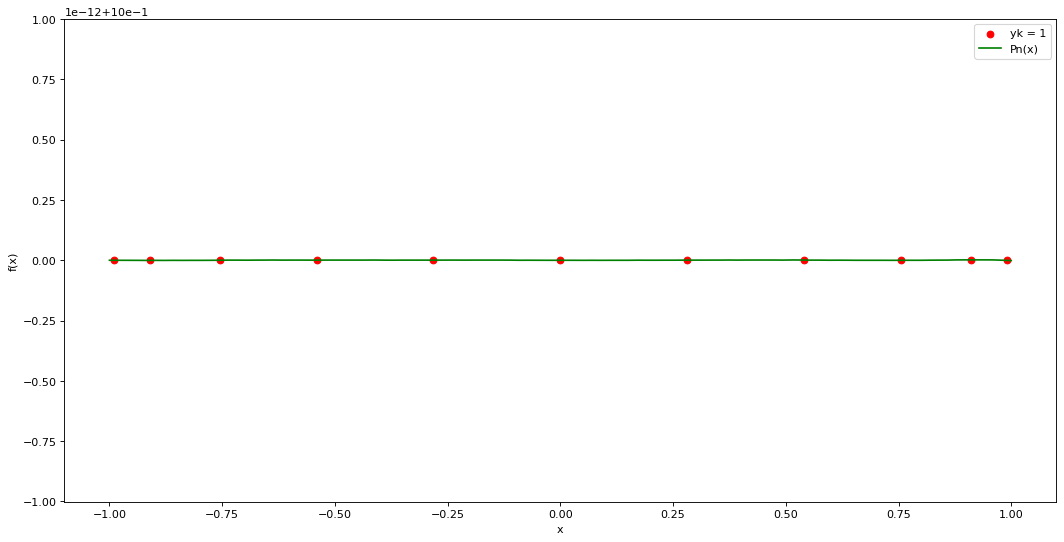

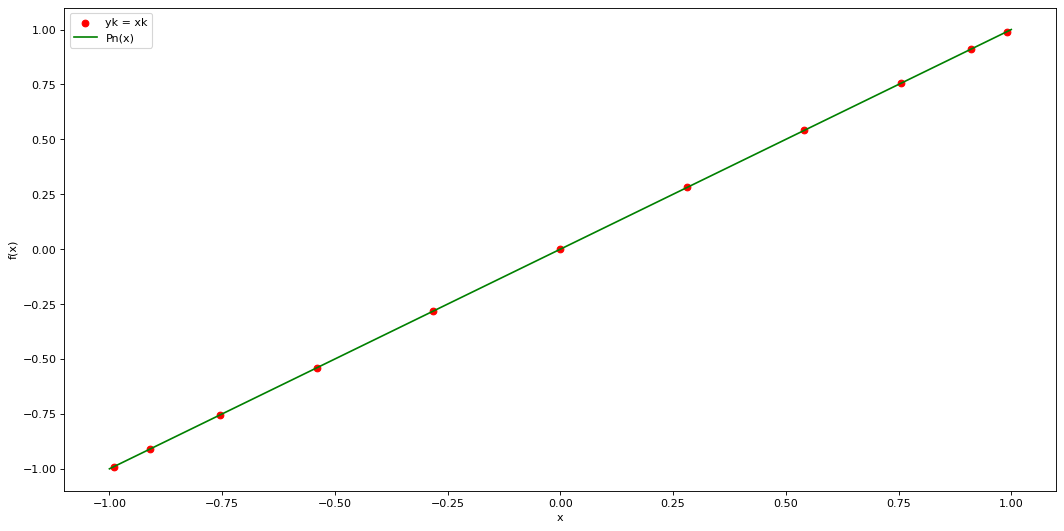

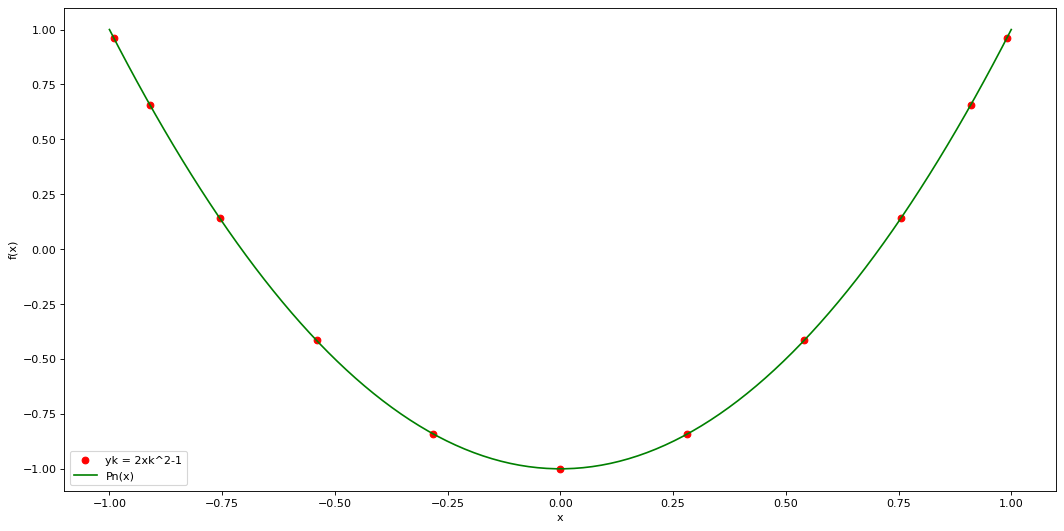

In [22]:
# Tracer la courbe associée
N = 100
x = np.linspace(-1,1,N)
n = 10 #on fixe un degré pour les tests

# Tester avec la fonction f(x) = 1
xk   = cheb_points(-1, +1, n)
yk   = cheb0(xk)
coef = compute_Tchebychev_coef(-1, 1, yk)

fig_equi=plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk, yk                             , color="red"  , label="yk = 1")
plt.plot(   x,  poly_interp_Tchebychev(coef, x), color="green", label="Pn(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


# Tester avec la fonction f(x) = x
val_x = cheb_points(-1, +1, n)
yk    = cheb1(val_x)
coef  = compute_Tchebychev_coef(-1, 1, yk)

fig_equi=plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk, yk                             , color="red"  , label="yk = xk")
plt.plot(   x,  poly_interp_Tchebychev(coef, x), color="green", label="Pn(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

# Tester avec la fonction f(x) = 2x^2-1
val_x = cheb_points(-1, +1, n)
yk    = cheb2(val_x)
coef  = compute_Tchebychev_coef(-1, 1, yk)

fig_equi=plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk, yk                             , color="red"  , label="yk = 2xk^2-1")
plt.plot(   x,  poly_interp_Tchebychev(coef, x), color="green", label="Pn(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
Alors, on va tester ces fonctions pour tracer le polynome d'interpolation des polynômes $1$, $x$ et $x^2$ pour $n = 2, 3, 5$ et $10$.
</div>

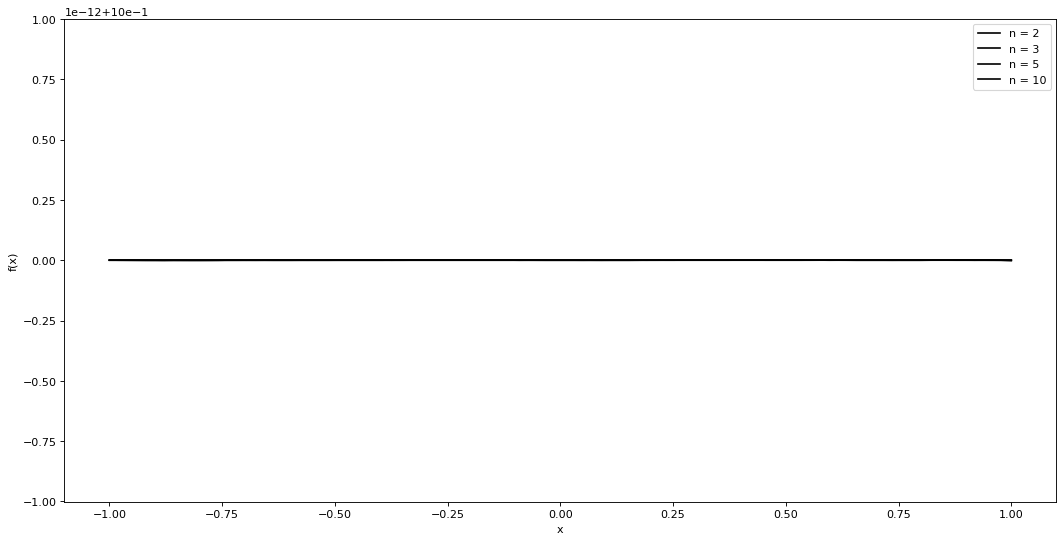

In [23]:
n_values = np.array([2, 3, 5, 10])

fig_equi=plt.figure(figsize=(16, 8), dpi=80)
for n in n_values:
    # Tester avec la fonction f(x) = 1
    xk   = cheb_points(-1, +1, n)
    yk   = cheb0(xk)
    coef = compute_Tchebychev_coef(-1, 1, yk)
    
    plt.plot(   x,  poly_interp_Tchebychev(coef, x), color="black", label="n = {}".format(n))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()    

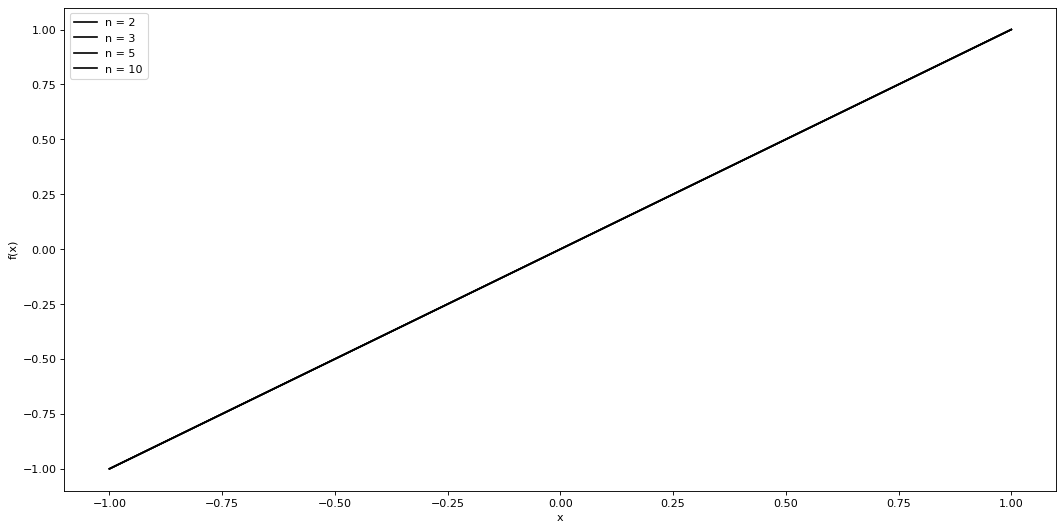

In [24]:
fig_equi=plt.figure(figsize=(16, 8), dpi=80)
for n in n_values:
    # Tester avec la fonction f(x) = x
    xk   = cheb_points(-1, +1, n)
    yk   = cheb1(xk)
    coef = compute_Tchebychev_coef(-1, 1, yk)
    
    plt.plot(   x,  poly_interp_Tchebychev(coef, x), color="black", label="n = {}".format(n))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()   

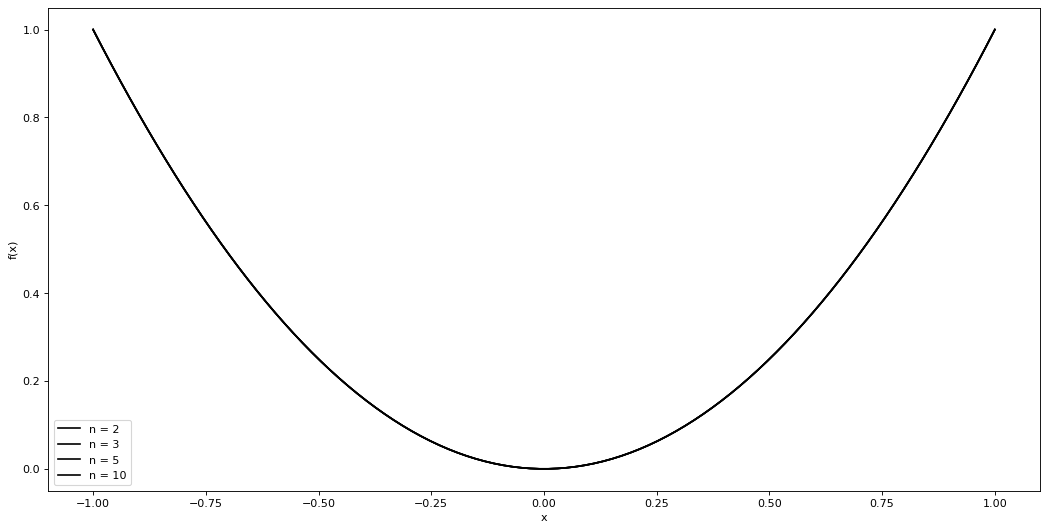

In [25]:
fig_equi=plt.figure(figsize=(16, 8), dpi=80)
for n in n_values:
    # Tester avec la fonction f(x) = x^2
    xk   = cheb_points(-1, +1, n)
    yk   = xk*xk
    coef = compute_Tchebychev_coef(-1, 1, yk)
    
    plt.plot(   x,  poly_interp_Tchebychev(coef, x), color="black", label="n = {}".format(n))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()   

d) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**  Tracer et comparer les courbes obtenues avec cet algorithme et avec celui donné pour la fonction de Runge de l'exercice précédent pour $n =10$. 

In [26]:
# Tracer les courbes
N    = 1000
xmin = -1
xmax =  1
x    = np.linspace(xmin, xmax, N)

# degre du polynome 
n = 10

# Évaluer aux points x le polynome d'interpolation aux points de Tchebychev
# dans la base de Lagrange (p_cheb) et dans la base de Tchebychev (p_cheb_2)

# points equidistants
xk_cheb2 = cheb_points(-1, 1, n) 
yk_cheb2 = f(xk_cheb2)

# polynome
p_cheb     = Lagrange(xk_cheb2, yk_cheb2, x)

coef_cheb2 = compute_Tchebychev_coef(-1, 1, yk_cheb2)
p_cheb2    = poly_interp_Tchebychev(coef_cheb2, x)

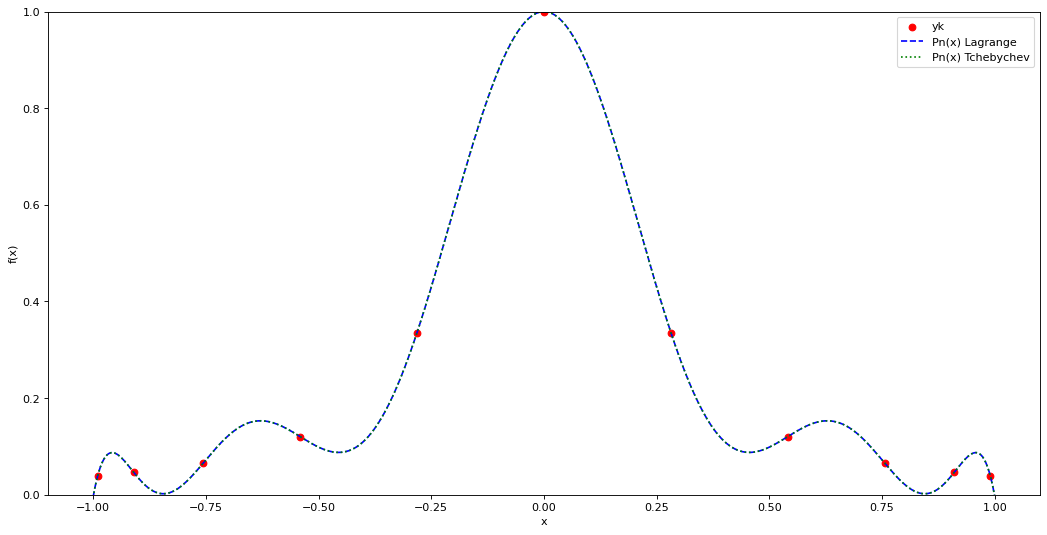

In [27]:
fig_equi=plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(xk_cheb2, yk_cheb2,                    color="red",   label="yk")
plt.plot(   x       , p_cheb , linestyle='dashed', color="blue",  label="Pn(x) Lagrange")
plt.plot(   x       , p_cheb2, linestyle='dotted', color="green", label="Pn(x) Tchebychev")
plt.ylim((0.,1.))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

e) **<font color=black><span style="background-color:skyblue">À rendre :</span></font>**  Pour cette fonction, augmenter le nombre de point au-delà $n=660$. Commenter la différence. 

**Réponse :**

In [28]:
# Tracer les courbes
N    = 1000
xmin = -1
xmax =  1
x    = np.linspace(xmin, xmax, N)

# degre du polynome 
n = 660


# Évaluer aux points x le polynome d'interpolation aux points de Tchebychev
# dans la base de Lagrange (p_cheb) et dans la base de Tchebychev (p_cheb_2)

# points equidistants
xk_cheb2 = cheb_points(-1, 1, n) 
yk_cheb2 = f(xk_cheb2)

# polynome
p_cheb     = Lagrange(xk_cheb2, yk_cheb2, x) 

coef_cheb2 = compute_Tchebychev_coef(-1, 1, yk_cheb2)
p_cheb2    = poly_interp_Tchebychev(coef_cheb2, x)

/home/gabriel/ENTER/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


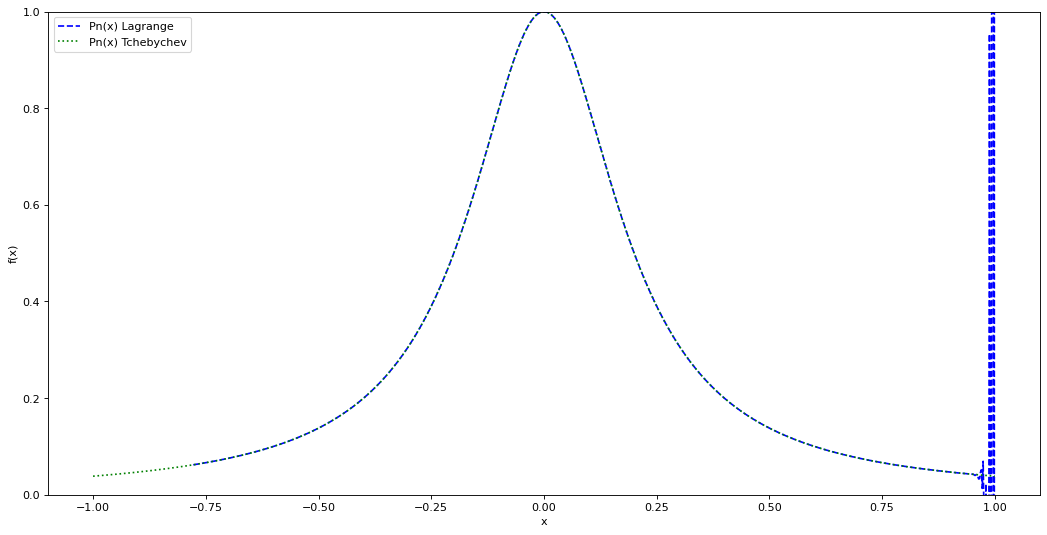

In [29]:
fig_equi=plt.figure(figsize=(16, 8), dpi=80)
#plt.scatter(xk_cheb2, yk_cheb2, color="red", label="yk")
plt.plot(x, p_cheb,  linestyle='dashed', color="blue",  label="Pn(x) Lagrange")
plt.plot(x, p_cheb2, linestyle='dotted', color="green", label="Pn(x) Tchebychev")
plt.ylim((0.,1.))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

**Réponse :**
<div class="alert alert-block alert-info">
    On observe que même pour un nombre très grand de points, l'interpolation fait dans la base de Tchebychev ne présente pas de grands erreurs au bord comme l'interpolation fait dans la base de Lagrange.
    On remarque que l'algorithme pour l'interpolation fait dans la base de Tchebychev nécessite moins de calculs et, en particulier, moins de divisions. Donc, on a moins de risque de perdre des chiffres significatifs lorsque la quantité de points augmente.
</div>    

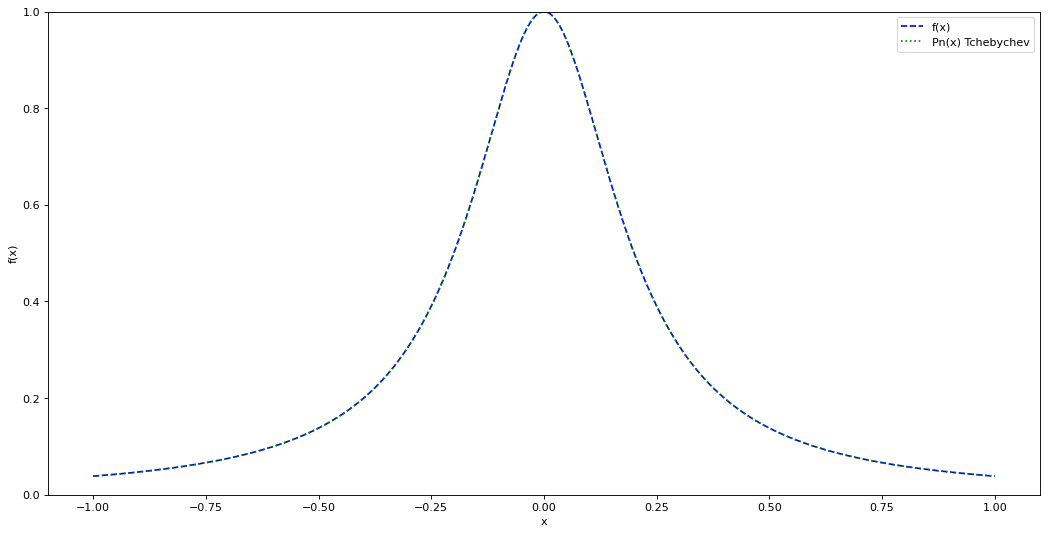

In [30]:
#Alors, on trace Pn(x) Tchebychev et la fonction de Runge pour les comparer directement
fig_equi=plt.figure(figsize=(16, 8), dpi=80)
plt.plot(x, f(x),  linestyle='dashed', color="blue",  label="f(x)")
plt.plot(x, p_cheb2, linestyle='dotted', color="green", label="Pn(x) Tchebychev")
plt.ylim((0.,1.))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()